# 우리나라 재가노인 서비스 현황 분석

![python image](image.jpg)

# 1.<br>
현재 우리나라는 빠르게 고령화 사회로 진입하였으며 약 30년후 세계 2위의 고령화 국가가 된다고 한다.<br>
 또한 이미 고령화 사회로 진입한 일본보다 한국이 7년 더 빨리 고령화 사회로 진입하게 되었으며 이는 전세계 유례없는 빠른 고령화 속도라고 말하고 있다.<br>
하지만 빠르게 변화해 가는 고령화 사회에 적응하기엔 부족한 노인 복지 시설, 서비스, 예산등 미흡한 점이 많은 우리나라의 현황에 대해 안타까움을
많이 느끼고 있으며 나 또한 할머니와 함께 살면서 그에대한 문제점을 직접 경험하고 있다.<br>
하지만 최근에 읽은 '엄마, 미안해'라는 한 일본인 남자가 치매가 걸린 어머니를 모시면서 일어나는 일들을 쓴 책을 읽고 우리보다 좀 더 빨리 
고령화가 찾아온 일본의 재가노인 서비스 현황을 알게되었고 일본 현황과 비교하여 우리나라의 재가노인 서비스 현황을 알고자 한다.<br>

# 2.<br>
우리나라 노인 요양 병원의 수용가능한 노인성 질환 환자의 비율을 알아봄으로써 전체 노인성 질환 환자의 어느정도가 요양 병원의 서비스를 받을 수 
있으며, 재가노인에 따른 서비스 현황을 분석하고 충분한 서비스가 이루어져 있는지 알아보고자 한다.<br>
또한 일본의 재가노인 서비스의 현황과 비교하여 우리나라의 현황을 좀 더 비교하며 우리나라의 부족한 부분, 개선되어야 하는 점등을 알아보고자 한다.
<br>


In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
%matplotlib inline

korea_population=pd.read_csv('../data/population.csv',encoding='euc-kr',dtype={'2015':object,'2016':object,'2017':object})
population=korea_population.iloc[[0,1,2],[1,2,3]]


population[['2015','2016','2017']]=population[['2015','2016','2017']].astype(int)
korea=population.T#행과 열 바꾸기
korea.rename(columns={korea.columns[0]:'인구(명): 0-14세',
                           korea.columns[1]:'인구(명): 15-64세',
                           korea.columns[2]:'인구(명): 65세 이상'},inplace=True)
korea.rename(index={korea.index[0]:'2015년',
                           korea.index[1]:'2016년',
                           korea.index[2]:'2017년'},inplace=True)
korea['고령화비율']=korea['인구(명): 65세 이상']/korea['인구(명): 0-14세']*100

np.savetxt('../data/new_korea.csv',korea,fmt='%d',delimiter=',')

korea

,인구(명): 0-14세,인구(명): 15-64세,인구(명): 65세 이상,고령화비율
2015년,7029883,37443896,6541168,93.048035
2016년,6856319,37626546,6762842,98.636630
2017년,6751043,37619640,7075518,104.806294


# 3.<br>
우리나라 통계청과 일본의 통계청에서 데이터를 다운받아 jupyter 화면에 
csv파일과 xls파일을 read함수로 읽어들였다.<br>

In [3]:


japan_population=pd.read_excel('../data/population_japan.xls')

japan_population_1=japan_population.iloc[[16,17,18],[4,8]]
japan_population_1.rename(columns={japan_population_1.columns[0]:'인구(명): 0-14세',
                                      japan_population_1.columns[1]:'인구(명): 15-64세'},inplace=True)
japan_population_1.rename(index={japan_population_1.index[0]:'2015년',
                                 japan_population_1.index[1]:'2016년',
                                 japan_population_1.index[2]:'2017년'},inplace=True)

japan_population_2=japan_population.iloc[[32,33,34],[9]]
japan_population_2.rename(columns={japan_population_2.columns[0]:'인구(명): 65세 이상'},inplace=True)
japan_population_2.rename(index={japan_population_2.index[0]:'2015년',
                                 japan_population_2.index[1]:'2016년',
                                 japan_population_2.index[2]:'2017년'},inplace=True)
japan=pd.concat([japan_population_1,japan_population_2],axis=1)
japan['인구(명): 0-14세']=japan['인구(명): 0-14세']*1000       #대한민국과 같은 인구 비율을 나타내기위해 1000단위를 1단위로 변경
japan['인구(명): 15-64세']=japan['인구(명): 15-64세']*1000
japan['인구(명): 65세 이상']=japan['인구(명): 65세 이상']*1000
japan['고령화비율']=japan['인구(명): 65세 이상']/japan['인구(명): 0-14세']*100

np.savetxt('../data/new_japan.csv',japan,fmt='%d',delimiter=',')

japan

,인구(명): 0-14세,인구(명): 15-64세,인구(명): 65세 이상,고령화비율
2015년,15887000,76289000,33465000,210.644
2016년,15780000,76562000,34591000,219.208
2017년,15592000,75962000,35152000,225.449


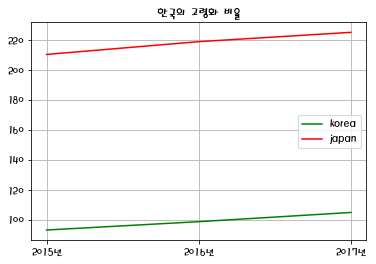

In [33]:
font_location = 'C:/Windows/Fonts/HMKMMAG.ttf'  
font_name = font_manager.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)
plt.plot(korea['고령화비율'],color='green',label='korea')
plt.plot(japan['고령화비율'],color='red',label='japan')
plt.title("한국의 고령화 비율")
plt.grid()
plt.legend()
plt.savefig("../data/elderly.png",dpi=300)
plt.show()


# 4.<br>

먼저 한국 인구를 연령별로 나타내고 그에따른 고령화 비율을 알고자 통계청에서 받은 우리나라 연령별 인구 데이터를 읽어들여 필요없는 
구성비는 추출하지 않았다. 또한 행을 연도별로 나타내고자 행과 열을 바꾸고 각 인덱스의 이름을 변경, 고령화 비율 계산을 위해 데이터 타입을
int형으로 변경했다.
이렇게 가공한 데이터를 기반으로 고령화 비율=((65세이상/0-14세)×100) 로 계산하여 추가했다.<br>

일본의 인구를 불러들인 파일또한 2014년도~2017년도까지의 연령별 데이터만 추출하고 인구수 비율을 한국과 같이 맞추어 주었으며, 한국과 똑같이 
인덱스 이름 변경하고 고령화 비율을 계산해주었다.
한국과 일본의 인구 데이터를 기반으로 두 나라의 연도별 고령화 비율을 나타낸 그래프를 나타내어 비교하였다.
 다음으로 연령에 따른 상위 질병을 알아보기위해 연령별 질병 데이터를 가져와 2016년,2017년도 65세이상의 데이터만 추출하여 int로 형변환을 해주고
65세 이상 연령별 나누어져 있는 데이터를 모두 더하여 연도별 65세 이상 column을 추가하고 나머지 연령은 삭제한다. 
정렬을 하기위해 질병에 따른 평균 병원비 비율을 알고자 평균비율=((2015년도 65세이상 병원비+2016년도 65세이상 병원비)/(2015년도합계+2016년도합계))×100을 해준다음 평균비율로 데이터를 정렬하고 상위 7대 질병을 데이터를 획득하였다.<br>

 그 다음으로 고령자 가족 수와 비율을 알아보기위해 2017 고령자 통계 통계표 엑셀 파일의 4번째 시트를 읽어들여 최근 5년간의 데이터만을 추출하고 
각 시트의 이름을 보기쉽게 변경해주었고 노인복지 현황을 알기위해 데이터를 읽어들여 종류에따른 여가복지와 재가복지를 각각의 복지수를 더해
한개의 여가복지와 재가복지로 만들어준다음 연도별 복지현황을 보기쉽게 바꾸어 주었다.
이 데이터를 좀 더 한눈에 알아보기쉽게 x축이 연도이고 y축이 각 복지의 개소를 나타낸 그래프를 생성해주었다.

In [34]:
disease=pd.read_csv('../data/diseases.csv',encoding='euc-kr')
disease=disease.iloc[:,[0,2,11,12,13,14,23,24,25]]
disease.rename(columns={disease.columns[0]:'질병',
                     disease.columns[1]:'2015년도합계(천원)',   
                    disease.columns[2]:'2015/65-69세',
                    disease.columns[3]:'2015/70-74세',
                    disease.columns[4]:'2015/75세 이상',
                    disease.columns[5]:'2016년도합계', 
                    disease.columns[6]:'2016/65-69세',
                    disease.columns[7]:'2016/70-74세',
                    disease.columns[8]:'2016/75세 이상'},inplace=True)


disease=disease.drop([0,1])
disease=disease.replace('-',0)

disease[['2015년도합계(천원)','2015/65-69세','2015/70-74세','2015/75세 이상','2016년도합계','2016/65-69세','2016/70-74세','2016/75세 이상']]=disease[
    ['2015년도합계(천원)','2015/65-69세','2015/70-74세','2015/75세 이상','2016년도합계','2016/65-69세','2016/70-74세','2016/75세 이상']].astype('int64')
disease['2015/65세이상']=disease['2015/65-69세']+disease['2015/70-74세']+disease['2015/75세 이상']
disease['2016/65세이상']=disease['2016/65-69세']+disease['2016/70-74세']+disease['2016/75세 이상']
disease=disease.drop(['2015/65-69세','2015/70-74세','2015/75세 이상','2016/65-69세','2016/70-74세','2016/75세 이상'],1)
disease=disease.reindex(columns=['질병','2015년도합계(천원)','2015/65세이상','2016년도합계','2016/65세이상'])
disease['평균비율']=((disease['2015/65세이상']+disease['2016/65세이상'])/(disease['2015년도합계(천원)']+disease['2016년도합계']))*100
disease=disease[disease['평균비율']>=0]
disease=disease.sort_values(by='평균비율',ascending=False).head(7)
np.savetxt('../data/new_disease.csv',disease,fmt='%s',delimiter=',')
disease


,질병,2015년도합계(천원),2015/65세이상,2016년도합계,2016/65세이상,평균비율
271,노쇠,2020427,2009585,1994890,1957162,98.790382
114,치매,1448395179,1413581954,1680430202,1642930870,97.688827
124,알쯔하이머병,40654508,38779490,51816244,49476158,95.441689
123,파킨슨병,375917576,335894492,437301968,393219592,89.657718
275,대퇴골의골절,299475640,262560660,328800535,290129319,87.969272
79,전립선의악성신생물,175795740,147600489,202209264,169022603,83.761614
153,심부전,128150057,105179266,143238402,117779334,82.154783


In [35]:

old=pd.read_excel('../data/2017 고령자 통계 통계표.xls',sheet_name="4")
old=old.iloc[[23,24,25,27,28],[1,2,3,4,5,6,7,8,9,10,11]]
old.rename(columns={old.columns[0]:'총 가구',
                    old.columns[1]:'고령자 가구(수)',
                    old.columns[2]:'고령자 가구 구성비',
                    old.columns[3]:'부부가구',
                    old.columns[4]:'부부 구성비',
                    old.columns[5]:'부부+자녀',
                    old.columns[6]:'부부+자녀 구성비',
                    old.columns[7]:'부(모)+자녀',
                    old.columns[8]:'부(모)+자녀 구성비',
                    old.columns[9]:'1인가구',
                    old.columns[10]:'1인 구성비'},inplace=True)
old.rename(index={old.index[0]:'2013년',
                  old.index[1]:'2014년',
                  old.index[2]:'2015년',
                  old.index[3]:'2016년',
                  old.index[4]:'2017년'},inplace=True)
np.savetxt('../data/new_old.csv',japan,fmt='%d',delimiter=',')
old


,총 가구,고령자 가구(수),고령자 가구 구성비,부부가구,부부 구성비,부부+자녀,부부+자녀 구성비,부(모)+자녀,부(모)+자녀 구성비,1인가구,1인 구성비
2013년,18388488,3331349,18.1165,1112719,33.4015,328829,9.87075,180701,5.42426,1106699,33.2207
2014년,18704975,3491732,18.6674,1161910,33.276,347307,9.94655,192977,5.52668,1152673,33.0115
2015년,19012895,3664081,19.2716,1214814,33.1547,366974,10.0154,205906,5.61958,1202854,32.8283
2016년,19284671,3817389,19.7949,1256108,32.9049,378951,9.92697,212863,5.57614,1266190,33.169
2017년,19523587,3999360,20.4848,1309505,32.7429,393052,9.82787,221220,5.53139,1336909,33.4281


In [36]:

service=pd.read_csv('../data/service.csv',encoding='euc-kr')
old_service=service.T
old_service=old_service.iloc[[2,4],[1,5,8,9,10,11,12,13,14,15,16]]
old_service.rename(columns={old_service.columns[0]:'주거복지',
                    old_service.columns[1]:'의료복지',
                    old_service.columns[2]:'여가복지1',
                    old_service.columns[3]:'여가복지2',
                    old_service.columns[4]:'여가복지3',
                    old_service.columns[5]:'재가노인복지1',
                    old_service.columns[6]:'재가노인복지2',
                    old_service.columns[7]:'재가노인복지3',
                    old_service.columns[8]:'재가노인복지4',
                    old_service.columns[9]:'재가노인복지5',
                    old_service.columns[10]:'재가노인복지6'},inplace=True)
old_service.rename(index={old_service.index[0]:'2016년',
                    old_service.index[1]:'2017년'},inplace=True)
old_service.loc['2016년']['재가노인복지5']=0
old_service[['여가복지1','여가복지2','여가복지3']]=old_service[['여가복지1','여가복지2','여가복지3']].astype(int)
old_service[['재가노인복지1','재가노인복지2','재가노인복지3','재가노인복지4','재가노인복지5','재가노인복지6']]=old_service[['재가노인복지1','재가노인복지2','재가노인복지3','재가노인복지4','재가노인복지5','재가노인복지6']].astype(int)
old_service['여가복지']=old_service['여가복지1']+old_service['여가복지2']+old_service['여가복지3']
old_service['재가복지']=old_service['재가노인복지1']+old_service['재가노인복지2']+old_service['재가노인복지3']+old_service['재가노인복지4']+old_service['재가노인복지5']+old_service['재가노인복지6']
old_service=old_service.drop(['여가복지1','여가복지2','여가복지3','재가노인복지1','재가노인복지2','재가노인복지3','재가노인복지4','재가노인복지5','재가노인복지6'],1)
old_service[['여가복지','재가복지','주거복지','의료복지']]=old_service[['여가복지','재가복지','주거복지','의료복지']].astype(int)
np.savetxt('../data/new_service.csv',old_service,fmt='%d',delimiter=',')
old_service

,주거복지,의료복지,여가복지,재가복지
2016년,75708,5163,66787,3168
2017년,76371,5242,67324,3216


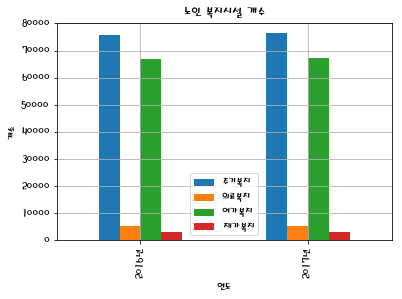

In [37]:
old_service.plot(kind='bar',grid=True)

plt.title("노인 복지시설 개수")
plt.xlabel("연도")
plt.ylabel("개소")
plt.savefig("../data/old_service.png",dpi=300)
plt.show()

# 5.<br>
우리나라와 일본의 연령별 고령화 비율을 나타내는 그래프를 보면 연도가 높아질 수록 증가하는 비율이 비슷한것을 볼 수 있다. 또한 최근 몇년간
65세이상 연령에서 각 질병 별 총 병원 진료비 중 상위 질병들은 노인성 질환이 많은 것을 확인할 수 있었다.<br>
또한 최근 몇년간 고령자 가구 구성비가 늘어나고있으며 가족 구성원에 노인이 포함된 형태가 점점 증가 하는것을 알 수 있고 노인 복지 시설 
그래프를 보았을때 의료복지와 재가복지가 현저히 낮은것을 확인 할 수 있다.

# 6.<br>
 우리나라는 현재 초고령화가 진행중인 일본과 비슷하게 고령화 비율이 증가하고 있으며 몇 년,몇 십년후에는 젊은사람 인구가 점점줄어든, 우리나라의
고령화 비율 증가 속도가 일본을 앞지를거라 예상할 수 있으며 급격히 고령화 비율이 늘어날 것이라 생각 된다.또한 현재 우리나라는 만성 노인성 
질환을 가진 노인분들이 많다는것을 바탕으로 노인구성 가족이 증가하는것을 보아 이는 노인성 질환을 가진 노인들과 함께사는 가족 구성원또한 
증가하겠지만 부족한 의료시설로인해 집에서 케어를 하는 경우가 많을것이라 예측할 수 있으며, 나라에서 운영하는 재가복지 시설조차 부족하여 
노인을 부양하는 가족 구성원들에게 많은 어려움이 있을것이라 생각이든다.<br>

향후 계속 늘어날것이라 예상하는 노인 인구 중 노인성 질환을 가진 환자들 또한 늘어나고 이러한 노인을 부양하는 가족구성원은 늘어갈텐데
이렇게 현저히 부족하기만한 시설들이 문제가 심각할 것으로 예상된다.<br>

# 7.<br>

- 한국 통계청 : http://kostat.go.kr/
  
- 일본 통계청 : http://www.stat.go.jp/
